# Analizador de CSV de precios históricos de criptomonedas

In [66]:
import pandas as pd

## Cargar y explorar los datos

In [67]:
path = "../data/BTC-USD (2014-2024).csv"
df = pd.read_csv(path)
display(df.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0


In [68]:
display(df.isnull())

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3408,False,False,False,False,False,False,False
3409,False,False,False,False,False,False,False
3410,False,False,False,False,False,False,False
3411,False,True,True,True,True,True,True


In [69]:
display(df[df.isnull().any(axis=1)])

,Date,Open,High,Low,Close,Adj Close,Volume
3411,2024-01-20,NaN,NaN,NaN,NaN,NaN,NaN


## Limpiar y preparar los datos

In [70]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3413 non-null   object 
 1   Open       3412 non-null   float64
 2   High       3412 non-null   float64
 3   Low        3412 non-null   float64
 4   Close      3412 non-null   float64
 5   Adj Close  3412 non-null   float64
 6   Volume     3412 non-null   float64
dtypes: float64(6), object(1)
memory usage: 186.8+ KB


None

In [71]:
df['Date'] = pd.to_datetime(df['Date'])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3413 non-null   datetime64[ns]
 1   Open       3412 non-null   float64       
 2   High       3412 non-null   float64       
 3   Low        3412 non-null   float64       
 4   Close      3412 non-null   float64       
 5   Adj Close  3412 non-null   float64       
 6   Volume     3412 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 186.8 KB


None

In [72]:
df = df.fillna(df.mean())

In [73]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [74]:

df=df[['Date','Close','Volume']]
df.set_index('Date',inplace=True)
df.head()


,Close,Volume
Date,,
2014-09-18,424.440002,34483200.0
2014-09-19,394.795990,37919700.0
2014-09-20,408.903992,36863600.0
2014-09-21,398.821014,26580100.0
2014-09-22,402.152008,24127600.0


## Analizar estadísticamente

In [75]:
df.describe()

,Close,Volume
count,3413.000000,3.413000e+03
mean,14758.111980,1.663026e+10
std,16292.985938,1.907328e+10
min,178.102997,5.914570e+06
25%,921.789001,1.689680e+08
50%,8293.868164,1.180170e+10
75%,24375.960938,2.696772e+10
max,67566.828125,3.509679e+11


In [76]:
std_Volume = df['Volume'].std()
mean_Volume = df['Volume'].mean()
print(f"Desviación estándar del volumen: {std_Volume}")
print(f"Media del volumen: {mean_Volume}")
print("la Desviación estándar es mayor que la media, lo que significa que hay \nuna gran dispersión en los datos, indicando que los valores individuales están, en promedio, bastante lejos de la media")

Desviación estándar del volumen: 19073277070.288666
Media del volumen: 16630263682.922626
la Desviación estándar es mayor que la media, lo que significa que hay 
una gran dispersión en los datos, indicando que los valores individuales están, en promedio, bastante lejos de la media


In [77]:
rango_medio = (df['Close'].max() - df['Close'].min())/2
print(f"Rango medio del precio de cierre: {rango_medio}")
print("Que el rango medio sea menor a la media significa que los datos extremos \ndel conjunto están más alejados que los valores intermedios, lo que indica una posible asimetría en la distribución de los datos.")

Rango medio del precio de cierre: 33694.362564
Que el rango medio sea menor a la media significa que los datos extremos 
del conjunto están más alejados que los valores intermedios, lo que indica una posible asimetría en la distribución de los datos.


In [78]:
correlacion = df['Close'].corr(df['Volume'])
print(f"Correlación entre Close y Volume: {correlacion}")
print("La correlación entre Close y Volume es positiva, lo que significa que a medida que el el precio de cierre aumenta, el volumen también tiende a aumentar.")

Correlación entre Close y Volume: 0.6771263349423353
La correlación entre Close y Volume es positiva, lo que significa que a medida que el el precio de cierre aumenta, el volumen también tiende a aumentar.


## Visualizar los resultados

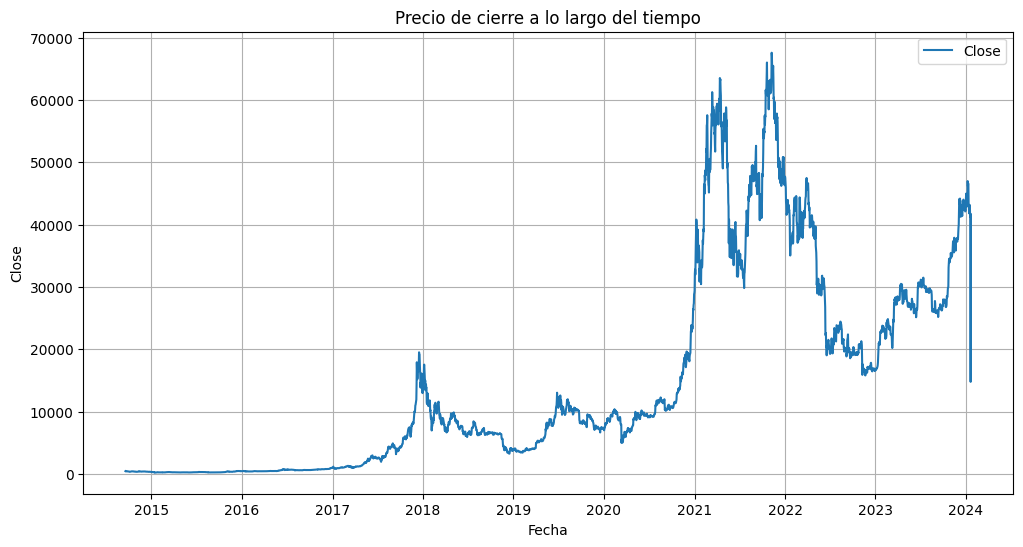

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Close'],label='Close')
plt.title('Precio de cierre a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.show()

## Conclusión general del análisis

In [80]:
print("El análisis descriptivo muestra que el mercado de esta criptomoneda presenta \nuna alta variabilidad tanto en el precio como en el volumen de negociación. \nLa relación positiva entre ambos sugiere que los movimientos de precios suelen \nir acompañados de mayor actividad comercial. Además, la dispersión y asimetría en los precios \nindican que existen picos de valor atípicos que afectan la media general.")

El análisis descriptivo muestra que el mercado de esta criptomoneda presenta 
una alta variabilidad tanto en el precio como en el volumen de negociación. 
La relación positiva entre ambos sugiere que los movimientos de precios suelen 
ir acompañados de mayor actividad comercial. Además, la dispersión y asimetría en los precios 
indican que existen picos de valor atípicos que afectan la media general.
